# Import Library

In [1]:
# Operasi Matematika dan Linear Algebra
import numpy as np

# Data Procession
import pandas as pd

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# Loading data with pandas read_csv
data = pd.read_csv('Indeks Stabilitas Keuangan.csv', sep=';')

In [3]:
# Cek dimensi data
data.shape

(50, 6)

In [4]:
# Melihat 5 data teratas
data.head()

,Indeks stabilitas sistem keuangan,IHSG,IHPR,Perkembangan Kredit,Kurs,Jumlah uang beredar
0,0.96,2598.33,131.89,1158.72,9.59,1991.58
1,0.96,416.67,135.89,133.03,8.48,684.34
2,1.06,1069.48,124.97,446.02,9.10,1016.24
3,0.92,385.33,137.47,308.06,7.25,577.38
4,1.04,2645.71,132.79,1217.66,9.63,2075.04


In [5]:
# Memahami info masing-masing variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Indeks stabilitas sistem keuangan  50 non-null     float64
 1   IHSG                               50 non-null     float64
 2   IHPR                               50 non-null     float64
 3   Perkembangan Kredit                50 non-null     float64
 4   Kurs                               50 non-null     float64
 5   Jumlah uang  beredar               50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [6]:
# Melihat ringkasan statistika deskriptif
data.describe()

,Indeks stabilitas sistem keuangan,IHSG,IHPR,Perkembangan Kredit,Kurs,Jumlah uang beredar
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.965200,2607.165400,150.964600,1965.57500,10.201800,2179.935000
std,0.141078,1907.860695,21.987873,4086.69641,1.816446,1470.262341
min,0.700000,366.670000,121.000000,133.03000,7.230000,216.370000
25%,0.902500,603.585000,136.260000,308.79250,9.005000,880.702500
50%,0.980000,2622.020000,144.495000,1188.19000,9.610000,1784.050000
75%,1.060000,4367.180000,157.137500,2450.83250,11.577500,3372.795000
max,1.240000,5419.450000,194.540000,29004.09000,14.060000,4884.040000


# Data Preprocessing

# Cek Tipe Data

In [7]:
data.dtypes

Indeks stabilitas sistem keuangan    float64
IHSG                                 float64
IHPR                                 float64
Perkembangan Kredit                  float64
Kurs                                 float64
Jumlah uang  beredar                 float64
dtype: object

In [9]:
# Drop duplicate data
data.drop_duplicates(inplace=True)
data.shape

(50, 6)

# Cek Missing Value

In [10]:
data.isnull().sum()

Indeks stabilitas sistem keuangan    0
IHSG                                 0
IHPR                                 0
Perkembangan Kredit                  0
Kurs                                 0
Jumlah uang  beredar                 0
dtype: int64

# Cek Outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Indeks stabilitas sistem keuangan'>

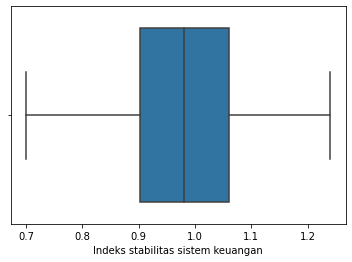

In [11]:
sns.boxplot(data['Indeks stabilitas sistem keuangan'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IHSG'>

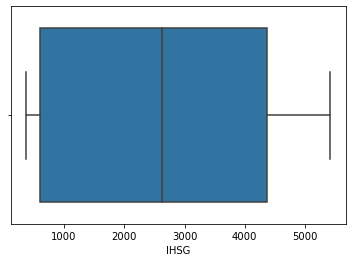

In [12]:
sns.boxplot(data['IHSG'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IHPR'>

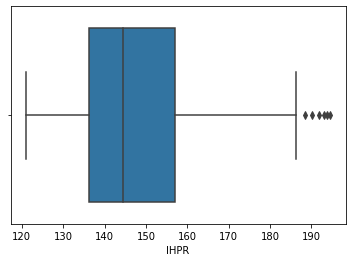

In [13]:
sns.boxplot(data['IHPR'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kurs'>

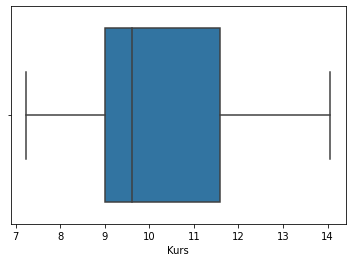

In [15]:
sns.boxplot(data['Kurs'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Jumlah uang  beredar'>

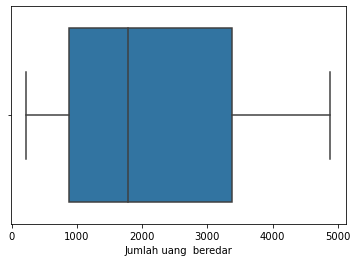

In [17]:
sns.boxplot(data['Jumlah uang  beredar'])

In [18]:
# Membuat fungsi untuk mendeteksi outlier dengan lower bound dan upper bound
def outlier(sample):
    Q1 = sample.quantile(0.25)
    Q3 = sample.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    number_outlier = len(sample[sample > upper_range] + len(sample[sample < lower_range]))
    print('Number of Outlier {}'.format(number_outlier))
    if number_outlier > 0:
        print('Outlier observation row:')
    else:
        pass
    for i in range(len(sample)):
        if sample[i] < lower_range:
            print(i)
        elif sample[i] > upper_range:
            print(i)
        else:
            pass

In [19]:
outlier(data['IHPR'])

Number of Outlier 6
Outlier observation row:
8
9
11
27
30
42


In [20]:
# Memeriksa ke aslian data
data.loc[[8, 9, 11, 27, 30, 42], 'IHPR']

8     191.90
9     190.02
11    193.13
27    194.54
30    188.55
42    193.83
Name: IHPR, dtype: float64

In [22]:
outlier(data['Perkembangan Kredit'])

Number of Outlier 1
Outlier observation row:
39


In [23]:
# Memeriksa ke aslian data
data.loc[[39], 'Perkembangan Kredit']

39    29004.09
Name: Perkembangan Kredit, dtype: float64

Jika terdapat outlier, maka hal pertama yang perlu kita lakukan adalah memeriksa data aslinya untuk mengetahui adanya outlier karena kesalahan atau memang data aslinya menunjukan seperti itu. Dalam kasus ini, data sebenarnya memang ada outlier. Maka kita dapat melakukan dua cara, 1. Membiarkan datanya outlier 2. bining. Dalam kasus ini kita biarkan.

# Melihat korelasi antar variabel

<AxesSubplot:>

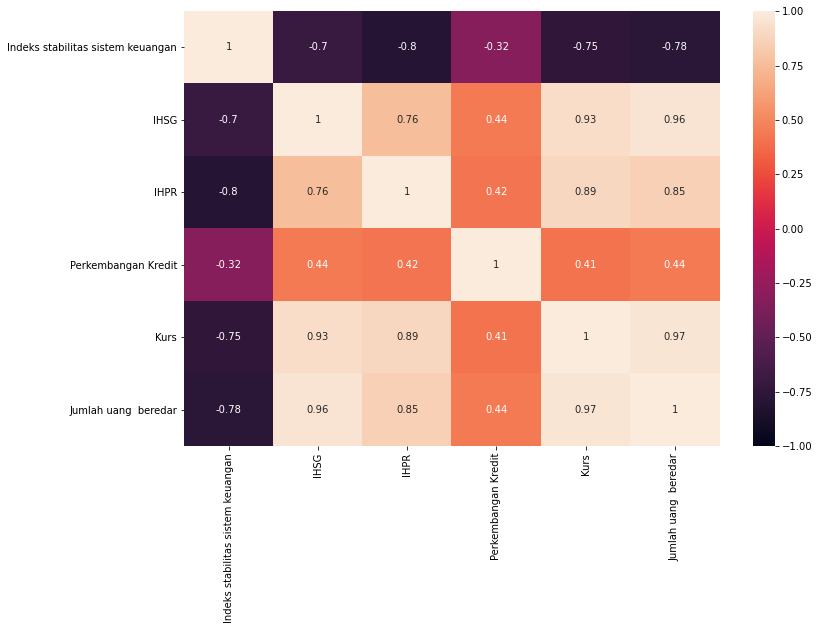

In [28]:
cor = data.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(cor, annot = True, vmin = -1, vmax = 1)

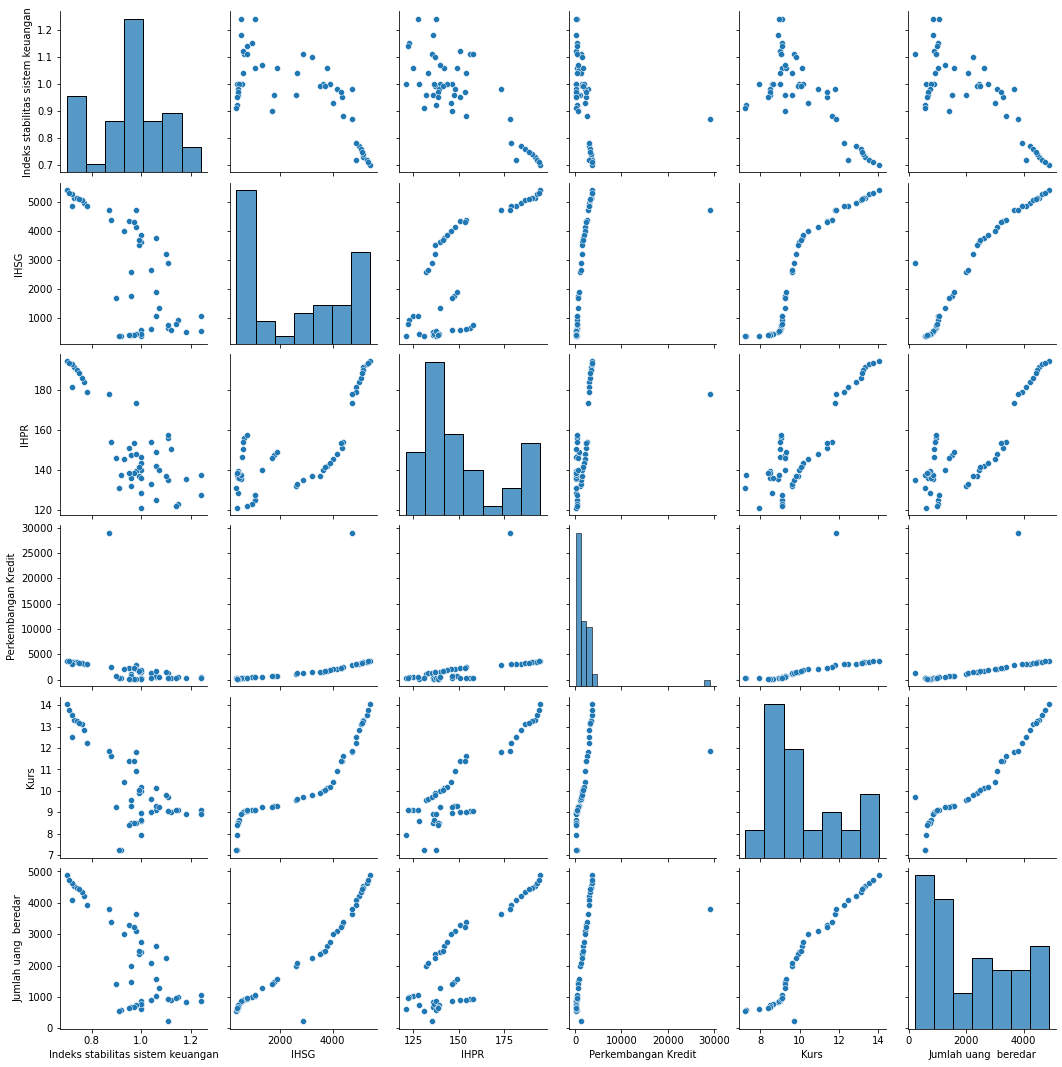

In [29]:
# Mencoba scatter plot dan distribusi
sns.pairplot(data = data)

Histogram untuk melihat distribusi normal atau tidak

scatterplot untuk melihat korelasi antar variabel, misalnya dapat diketahui bahwa korelasi antar perkembangan kredit dengan indeks stabilitas harga kecil atau tidak bagus

# Feature Scalling

Sebelum melakukan regresi, dilakukan featur scaling untuk menyamakan skala antar data

Menggunakan Standarisasi. Dipisahkan y dengan x. Lalu x nya distandarisasi

In [30]:
from sklearn.preprocessing import StandardScaler

# Memisahkan variabel dependen dengan variabel independen
y = data['Indeks stabilitas sistem keuangan']
x = data.iloc[:, 1:]

# Standarisasi pada variabel independen
scale = StandardScaler()
x = scale.fit_transform(x)
# Membuat dataframe sebelum di regersi. Jika tidak, maka akan berbentuk array
x = pd.DataFrame(data = x, columns=['IHSG', 'IHPR', 'Perkembangan Kredit', 'Kurs', 'Jumlah uang  beredar'])

# Partisi data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# test_size merupakan ukuran data test 20 % data data keseluruhan
# random_state agar data yang dirandom sama

# Modeling

In [38]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # untuk memeriksa multikolinearitas
from scipy import stats

# Regresi Linear

In [46]:
# Untuk menambahkan B0 atau konstanta
X_train2 = sm.add_constant(X_train)

# Modeling y_train (output), x_train2 (input)
est = sm.OLS(Y_train, X_train2)
est2 = est.fit()

In [40]:
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.758
Model:                                           OLS   Adj. R-squared:                  0.722
Method:                                Least Squares   F-statistic:                     21.26
Date:                               Sat, 08 May 2021   Prob (F-statistic):           1.36e-09
Time:                                       05:10:48   Log-Likelihood:                 51.058
No. Observations:                                 40   AIC:                            -90.12
Df Residuals:                                     34   BIC:                            -79.98
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
                           coef    std err          t      P

Prob (F-statistict) > 0.05 maka menolak H0, artinya secara simultan variabel independen memengaruhi variabel dependen

Uji Partial

> conts: 0.000 artinya pvalue < alpha maka berpengaruh

> IHSG: 0.026 artinya pvalue < alpha maka berpengaruh

> IHPR: 0.103 artinya pvalue > alpha maka tidak berpengaruh

> Perkembangan Kredit: 0.012 artinya pvalue < alpha maka berpengaruh

> Kurs: 0.007 artinya pvalue < alpha maka berpengaruh

> Jumlah uang yang beredar: 0.114 artinya pvalue > alpha maka tidak berpengaruh

Ketika terdapat lebih dari 1 variabel yang tidak berpengaruh, jangan langsung di drop. Melihat variabel yang pvaluenya paling besar, karena biasanya variabel tersebut tidak berpengaruh.

Jika dilihat dari hasilnya maka jumlah uang yang beredar paling tidak berpengaruh maka perlu dikeluarkan dalam model. Dapat dilihat di bawah ini:

In [47]:
X_train2 = sm.add_constant(X_train.drop(labels=['Jumlah uang  beredar'], axis=1))
est = sm.OLS(Y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.739
Model:                                           OLS   Adj. R-squared:                  0.709
Method:                                Least Squares   F-statistic:                     24.77
Date:                               Sat, 08 May 2021   Prob (F-statistic):           8.65e-10
Time:                                       05:29:27   Log-Likelihood:                 49.567
No. Observations:                                 40   AIC:                            -89.13
Df Residuals:                                     35   BIC:                            -80.69
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

Jika dilihat pvalue IHPR besar, maka perlu dihapus

In [48]:
X_train2 = sm.add_constant(X_train.drop(labels=['Jumlah uang  beredar', 'IHPR'], axis=1))
est = sm.OLS(Y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.714
Model:                                           OLS   Adj. R-squared:                  0.690
Method:                                Least Squares   F-statistic:                     29.92
Date:                               Sat, 08 May 2021   Prob (F-statistic):           6.96e-10
Time:                                       05:29:58   Log-Likelihood:                 47.723
No. Observations:                                 40   AIC:                            -87.45
Df Residuals:                                     36   BIC:                            -80.69
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

kurs perlu dihapus

In [49]:
X_train2 = sm.add_constant(X_train.drop(labels=['Jumlah uang  beredar', 'IHPR', 'Kurs'], axis=1))
est = sm.OLS(Y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.683
Model:                                           OLS   Adj. R-squared:                  0.666
Method:                                Least Squares   F-statistic:                     39.80
Date:                               Sat, 08 May 2021   Prob (F-statistic):           5.99e-10
Time:                                       05:30:36   Log-Likelihood:                 45.664
No. Observations:                                 40   AIC:                            -85.33
Df Residuals:                                     37   BIC:                            -80.26
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

Semua variabel menjadi signifikan. 

Adj R square: 66.6% variabel x memengaruhi variabel y. sisanya diluar model

Prob(JB): 0.297 berarti pvalue > 0.05 atau gagal ditolak H0, maka residual berdistribusi normal atau asumsi normalitas terpenuhi



In [53]:
# Cek Autokorelasi menggunakan ljungbox
residual = est2.resid
sm.stats.diagnostic.acorr_ljungbox(residual, lags = [20], return_df = True)

,lb_stat,lb_pvalue
20,22.180794,0.330781


pvalue > 0.05 atau H0 gagal ditolak maka asumsi antar residual tidak saling berkorelasi terpenuhi

In [55]:
# Cek Multikolinearitas
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train.drop(labels=['Jumlah uang  beredar',
                                                           'IHPR', 'Kurs'], axis = 1).values, i) for i in range(X_train.drop(labels = ['Jumlah uang  beredar', 
                                                                                                                                      'IHPR', 'Kurs'], axis = 1). shape[1])]
vif['features'] = X_train.drop(labels = ['Jumlah uang  beredar', 'IHPR', 'Kurs'], axis = 1).columns
vif

,VIF Factor,features
0,4.883456,IHSG
1,4.883456,Perkembangan Kredit


Variabel input yang memiliki nilai VIF Factor yang melebih 10 maka variabel tersebut terkena multikolinearitas. Dalam kasus ini tidak ada multikolinearitas

In [56]:
# Cek Homoskedastis
bp_test = sm.stats.diagnostic.het_breuschpagan(residual, est2.model.exog)
labels = ['LM Statistic', 'LM_Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 7.487258634510066, 'LM_Test p-value': 0.02366804820969785, 'F-Statistic': 4.260307772307989, 'F-Test p-value': 0.021621288035320495}


In [58]:
# est2.model.exog merupakan variabel input
est2.model.exog

array([[ 1.        , -1.10138249, -0.43221402],
       [ 1.        ,  0.02040816, -0.18487017],
       [ 1.        ,  1.19856605,  0.25537352],
       [ 1.        ,  1.34924226,  0.36786299],
       [ 1.        , -1.17639233, -0.40970574],
       [ 1.        , -1.14621261, -0.4478309 ],
       [ 1.        , -1.15591777, -0.45134334],
       [ 1.        ,  0.90391142,  0.0752999 ],
       [ 1.        ,  0.58354579, -0.08335057],
       [ 1.        , -1.04066832, -0.40332354],
       [ 1.        ,  1.33507897,  0.36099631],
       [ 1.        , -1.18627221, -0.41281775],
       [ 1.        ,  0.74620387,  0.016943  ],
       [ 1.        ,  1.20552857,  0.27406533],
       [ 1.        , -1.13703162, -0.44098152],
       [ 1.        , -0.00467807, -0.199439  ],
       [ 1.        , -0.98360747, -0.40162541],
       [ 1.        ,  1.4890167 ,  0.44005954],
       [ 1.        , -1.09096785, -0.42618775],
       [ 1.        ,  1.12405922,  0.20202945],
       [ 1.        ,  0.48299438, -0.118

Memeriksa Homoskedastis menggunakan het_breuschpagan. Jika dilihat dari hasil LM_Test p-value < 0.05 maka H0 ditolak atau asumsi tidak terpenuhi. Cara mengatasinya dapat bermacam-macam, salah satunya bisa standarisasi, transformasi. Atau dibiarkan saja jika ingin cepat

# Evaluasi Model

In [57]:
from sklearn.metrics import mean_squared_error

# membuat prediksi data testing yang sudah didrop variabel 'Jumlah uang  beredar', 'IHPR', 'Kurs' dan ditambah konstanta
pred_lr = est2.predict(sm.add_constant(X_test.drop(labels=['Jumlah uang  beredar', 'IHPR', 'Kurs'], axis = 1)))

# Kemudian dibandingkan data asli Y_test dengan nilai prediksi pred_lr
mean_squared_error(Y_test, pred_lr)

4.087424830993151

# Regresi Ridge

In [61]:
# Cek Multikolinearitas
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
vif

,VIF Factor,features
0,15.949809,IHSG
1,6.639688,IHPR
2,6.229725,Perkembangan Kredit
3,20.474934,Kurs
4,23.468013,Jumlah uang beredar


Jika dilihat secara keseluruhan terdapat 2 variabel yang terkena multikolinearitas

In [62]:
# Melihat Keunggulan Ridge
from sklearn.linear_model import Ridge
coef = []
alphas = range(0, 40)

for a in alphas:
    ridgereg = Ridge(alpha = a)
    ridgereg.fit(X_train, Y_train) # membagi data training dan data testing, constanta sudah otomatis ada di regresi ridge
    coef.append(ridgereg.coef_)

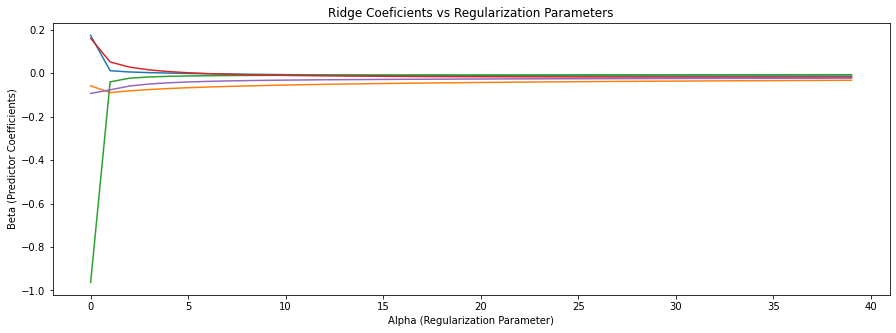

In [63]:
# Membuat plot antara alpha dan coefisien
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coeficients vs Regularization Parameters')
ax.axis('tight')

# ax.legend(loc = 'best')
fig.savefig('coef_vs_alpha.png')

Masing-masing warna menunjukan masing-masing variabel input

Semakin besar Alpha nya maka Slopenya akan semakin menurun

In [64]:
# Membangun model regresi ridge dengan nilai alpha terbaik
from sklearn.linear_model import RidgeCV # Ridge cross validation 
regr_cv = RidgeCV(alphas = range(1, 40))
model_cv = regr_cv.fit(X_train, Y_train)

# Alpha terbaik
print(model_cv.alpha_)

# Parameter regresi ridge
print(model_cv.intercept_)
print(model_cv.coef_)

1
0.950708337549076
[ 0.01169928 -0.08888263 -0.0396696   0.05181744 -0.07637162]


In [ ]:
# Cek Autokorelasi
import statsmodels.api as sm
residual1 = Y_train-(model_cv.predict(Xtrain))
sm.stats.diagnostic.acorr_ljungbox(residual1, lags[20], return_df = True)

In [ ]:
2:10:23

In [ ]:
# Cek Homoskedastis
bp_test = sm.stats.diagnostic.het_breuschpagan(residual1, x_train)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

In [ ]:
# Cek Normalitas
import scipy
scipy.stats.jarque_bera(residual1)

# Evaluasi Model

In [ ]:
# MSE
pred_lridge = model_cv.predict(X_test)
mean_squared_error(Y_test, pred_lridge)

# Regresi Lasso

In [ ]:
# Melihat keunggulan Lasso
from sklearn.linear_model import Lasso
coef = []
alphas = range(0, 40)

for a in alphas:
    lassoreg = Lasso(alpha = a)
    lassoreg.fit(X_train, Y_train)
    coef.append(lassoreg.coef_)

In [ ]:
# Membuat plot antara alpha dan koefisien
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Lasso Coeffficients VS Regularization Parameters')
ax.axis('tight')

# ax.legend(loc = 'best')
fig.savefig('coef_vs_alpha.png')

In [ ]:
# Membangun model regresi Lasso dengan alpha terbaik
from sklearn.linear_model import LassoCV
regl_cv = LassoCV(alphas = range(1, 40))
model_cv = regl_cv.fit(X_train, Y_train)

# alpha terbaik
print(model_cv.alpha_)

# parameter regresi lasso
print(model_cv.intercept_)
print(model_cv.coef_)

In [ ]:
# Cek Autokorelasi
import statsmodels.api as sm
residual1 = Y_train-(model_cv.predict(X_train))
sm.stats.diagnostic.acorr_ljungbox(residual1, lags=[20], return_df = True)

In [ ]:
# Cek Homoskedastis
bp_test = sm.stats.diagnostic.het_breuschpagan(residual1, X_train)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

In [ ]:
# Cek Normalitas
import scipy
scipy.stats.jarque_bera(residual1)

# Regresi Elastic Net

In [ ]:
# Melihat keunggulan dari elastic net
from sklearn.linear_model import ElasticNet
coef = []
alphas = range(0, 40)

for a in alphas:
        Enetreg = ElasticNet(alpha = a)
        Enetreg.fit(X_train, Y_train)
        coef.append(Enetreg.coef_)

In [ ]:
# Membuat plot antara alpha dan koefisien
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Elastic Net Coeffficients VS Regularization Parameters')
ax.axis('tight')

# ax.legend(loc = 'best')
fig.savefig('coef_vs_alpha.png')

In [ ]:
# Membangun model regresi ElasticNetCV dengan nilai alpha terbaik
from sklearn.linear_model import ElasticNetCV
Enet_cv = ElasticNetCV(alphas = range(1), l1_Ratio = 0.5)
model_cv = Enet_cv.fit(X_train, Y_train)

# Alpha terbaik
print(model_cv.alpha_)

# parameter regresi ElasticNetCV
print(model_cv.intercept_)
print(model_cv.coef_)

In [ ]:
# Cek Autokorelasi
import statsmodels.api as sm
residual1 = Y_train-(model_cv.predict(X_train))
sm.stats.diagnostic.acorr_ljungbox(residual1, lags=[20], return_df = True)

In [ ]:
# Cek Homoskedastis
bp_test = sm.stats.diagnostic.het_breuschpagan(residual1, X_train)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

In [ ]:
# Cek Normalitas
import scipy
scipy.stats.jarque_bera(residual1)

# Evaluasi Model

In [ ]:
# MSE 
pred_Enet = model_cv.predict(X_test)
mean_squared_error(Y_test, pred_Enet)